In [56]:
# Imports
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

# Exercise Session 2

## Exercise 2.1

This exercise wants us to analytically show the linearity of expectation.
We can also show this with code numerically:

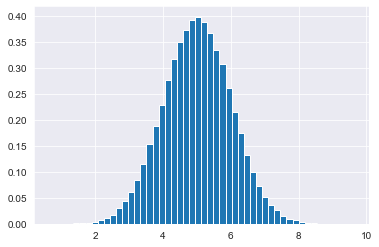

Monte Carlo Simulated Mean: 4.999029885313568


In [57]:
mu = 0
std = 1

a = 1
b = 5

X = a*scipy.stats.norm.rvs(loc=mu, scale=std, size=100000) + b
plt.hist(X, bins=50, density=True)
plt.show()

print("Monte Carlo Simulated Mean: {}".format(np.mean(X)))

## Exercise 2.8

Below is bayesian linear regression performed on some data

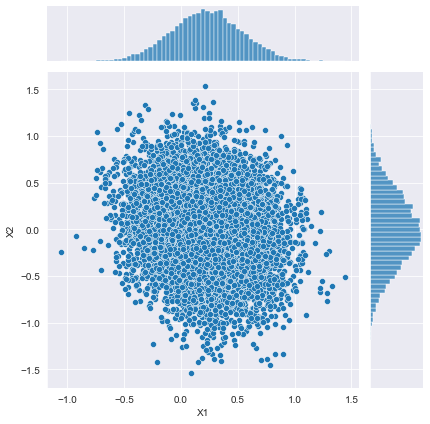

In [74]:
X = np.array(
    [
        [3, -1],
        [4, 2],
        [2, 1]
    ]
)

Y = np.array(
    [2, 1, 1]
)

#MLE Estimate:
w_hat = np.linalg.inv(X.T@X)@X.T@Y
y_hat = w_hat[0]*X[:, 0] + w_hat[1]*X[:, 1]

r2_score(Y, y_hat)

# Bayesian Estimate:
beta_inv = 0.2 
mean = np.array([0, 0])
cov = np.eye(2)*beta_inv

Sn = np.linalg.inv(np.linalg.inv(cov) + beta_inv*X.T@X)
Mn = Sn@(np.linalg.inv(cov)@mean + beta_inv*X.T@Y)
posterior = scipy.stats.multivariate_normal(mean=Mn, cov=Sn)
df = pd.DataFrame(columns = {'X1', 'X2'}, data=posterior.rvs(size=10000))
sns.jointplot(data=df, x="X1", y="X2")

C:\Apps\Anaconda3\envs\APML\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='R2', ylabel='Density'>

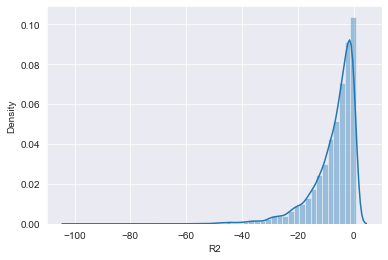

In [76]:
df['R2'] = df.apply(lambda row: r2_score(Y, row['X1']*X[:, 0] + row['X2']*X[:, 1]), axis=1)
sns.distplot(df['R2'])